In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. The data set of size n = 15 (Yield data) contains measurements of yield from an experiment done at
# five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit.
# The table below gives the data used for this analysis
# a. Create a CSV file with sample data.
# b. Write a Python function program to:
# Find the fitted simple linear and polynomial regression equations for the given data.
# c. Compare the coefficients obtained from manually intuitive and matrix formulation methods with
# your program.
# d. Plot the scatterplot of the raw data and then another scatterplot with lines pertaining to a linear fit
# and a quadratic fit overlayed.
# e. Compute the error, MSE, and RMSE.

In [2]:
data = {
    "temp": [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    "yield": [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

df = pd.DataFrame(data)

In [3]:
df

,temp,yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [4]:
X = df['temp']
y = df['yield']

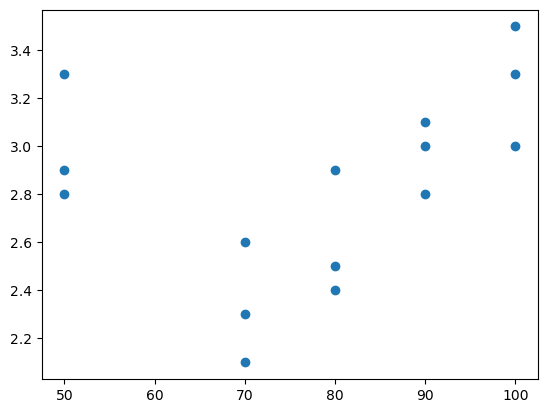

In [5]:
plt.scatter(X, y)

Polynomial Regression

In [6]:
def polynomial_regression(X, y, degree):
    A = np.zeros([degree+1, degree+1])
    Y = np.zeros([degree+1])
    X_powers = np.zeros([degree+1, len(X)])
    
    for row in range(len(A)):
        Y[row] = np.sum((X ** row) * y)
        X_powers[row] = X**row
        for col in range(len(A)):
            A[row][col] = np.sum(X ** (row+col))
            
    beta = np.linalg.inv(A).dot(Y)
    
    y_pred = beta.dot(X_powers)
    
    error = np.mean(abs(y_pred - y))
    mse = np.mean((y_pred - y) ** 2)
    rmse = np.sqrt(np.mean((y_pred - y) ** 2))
    print(f"Error: {error}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.show()
    
    df[f'{degree}_degree_pred'] = y_pred
    return beta, rmse

Error: 0.2994594594594587
MSE: 0.1327087087087086
RMSE: 0.3642920651190588


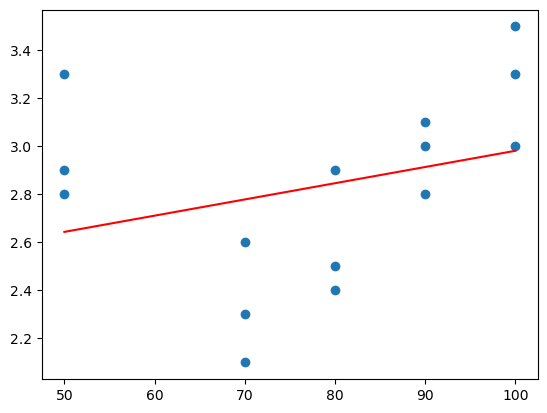

In [9]:
# Simple Linear Regression:
simple_beta, simple_rmse = polynomial_regression(X, y, 1)

Error: 0.18593356242827233
MSE: 0.04778465063001146
RMSE: 0.21859700508015076


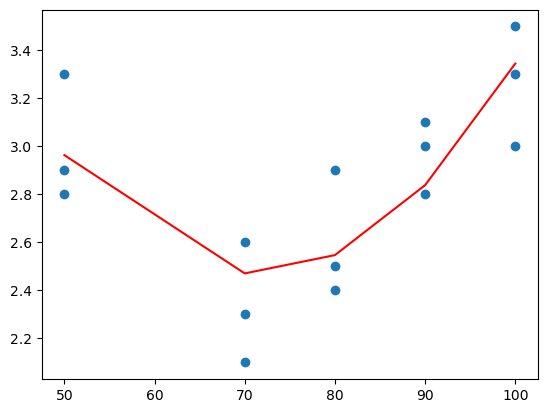

Error: 0.1728721174072429
MSE: 0.038681341719077576
RMSE: 0.19667572732566055


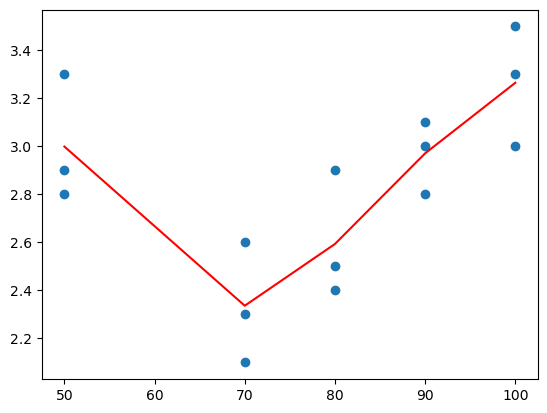

Error: 0.17333332735996052
MSE: 0.03866666666666732
RMSE: 0.19663841605003668


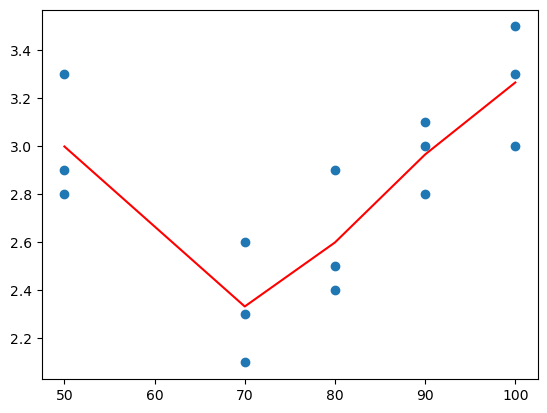

In [10]:
# Polynomial Regression

deg_2_beta, deg_2_rmse = polynomial_regression(X, y, 2)
deg_3_beta, deg_3_rmse = polynomial_regression(X, y, 3)
deg_4_beta, deg_4_rmse = polynomial_regression(X, y, 4)

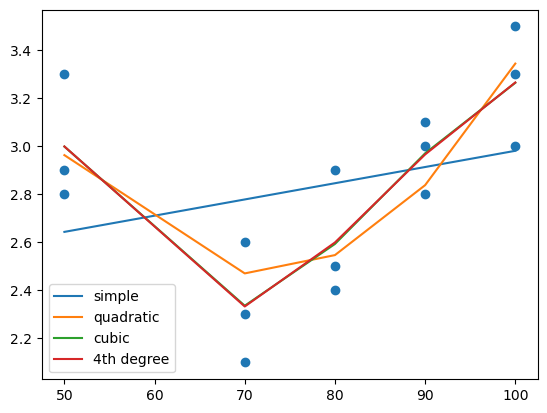

In [11]:
plt.scatter(X, y)
plt.plot(X, df['1_degree_pred'], label='simple')
plt.plot(X, df['2_degree_pred'], label='quadratic')
plt.plot(X, df['3_degree_pred'], label='cubic')
plt.plot(X, df['4_degree_pred'], label='4th degree')
plt.legend()
plt.show()

In [12]:
# Question 2: 

# When heart muscle is deprived of oxygen, the tissue dies and leads to a heart attack ("myocardial
# infarction"). Apparently, cooling the heart reduces the size of the heart attack. It is not known, however,
# whether cooling is only effective if it takes place before the blood, flow to the heart becomes restricted.
# Some researchers (Hale, et al, 1997) hypothesized that cooling the heart would be effective in reducing
# the size of the heart attack even if it takes place after the blood flow becomes restricted.
# To investigate their hypothesis, the researchers conducted an experiment on 32 anesthetized rabbits
# that were subjected to a heart attack. The researchers established three experimental groups:
# Rabbits whose hearts were cooled to 6º C within 5 minutes of the blocked artery ("early cooling")
# Rabbits whose hearts were cooled to 6º C within 25 minutes of the blocked artery ("late cooling")
# Rabbits whose hearts were not cooled at all ("no cooling")
# At the end of the experiment, the researchers measured the size of the infarcted (i.e., damaged) area (in
# grams) in each of the 32 rabbits. But, as you can imagine, there is great variability in the size of hearts.
# The size of a rabbit's infarcted area may be large only because it has a larger heart. Therefore, in order
# to adjust for differences in heart sizes, the researchers also measured the size of the region at risk for
# infarction (in grams) in each of the 32 rabbits.

In [32]:
df = pd.read_csv('q2.csv')

In [33]:
df

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [34]:
y = df['Infarc']
X = df[['Area', 'X2', 'X3']]
X.columns = [0, 1, 2]

In [36]:
A = [[len(X[0]), np.sum(X[0]), np.sum(X[1]), np.sum(X[2])],
    [np.sum(X[0]), np.sum(X[0] ** 2), np.sum(X[0] * X[1]), np.sum(X[2] * X[0])],
    [np.sum(X[1]), np.sum(X[0] * X[1]), np.sum(X[1] ** 2), np.sum(X[2] * X[1])],
    [np.sum(X[2]), np.sum(X[0] * X[2]), np.sum(X[1] * X[2]), np.sum(X[2] ** 2)]]

Y = [[np.sum(y)], [np.sum(X[0] * y)], [np.sum(X[1] * y)], [np.sum(X[2] * y)]]

beta = np.linalg.inv(A).dot(Y)

In [37]:
beta

array([[-0.13453638],
       [ 0.61265498],
       [-0.24348223],
       [-0.06565569]])

In [39]:
y_pred = beta[3] * X[2] + beta[2] * X[1] + beta[1] * X[0] + beta[0]

In [40]:
df['predictions'] = y_pred

In [41]:
df

,Infarc,Area,Group,X2,X3,predictions
0,0.119,0.34,3,0,0,0.073766
1,0.190,0.64,3,0,0,0.257563
2,0.395,0.76,3,0,0,0.331081
3,0.469,0.83,3,0,0,0.373967
4,0.130,0.73,3,0,0,0.312702
5,0.311,0.82,3,0,0,0.367841
6,0.418,0.95,3,0,0,0.447486
7,0.480,1.06,3,0,0,0.514878
8,0.687,1.20,3,0,0,0.600650
9,0.847,1.47,3,0,0,0.766066


In [44]:
error = np.mean(abs(y_pred - y))
mse = np.mean((y_pred - y) ** 2)
rmse = np.sqrt(np.mean((y_pred - y) ** 2))
print(f"Error: {error}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Error: 0.09662954961544507
MSE: 0.0170284226245642
RMSE: 0.13049299837372194


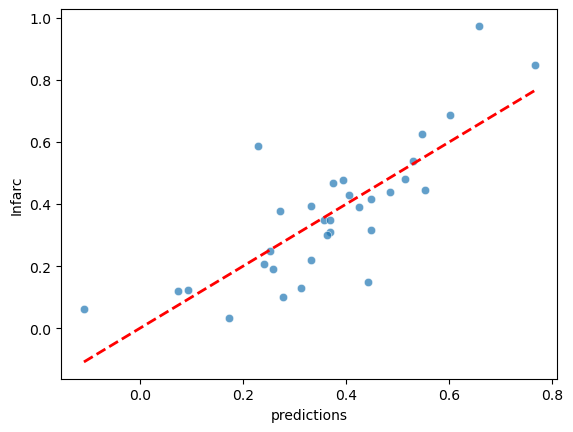

In [49]:
sns.scatterplot(x=df['predictions'], y=df['Infarc'], alpha=0.7)
plt.plot([df['predictions'].min(), df['predictions'].max()], 
         [df['predictions'].min(), df['predictions'].max()], 
         'r--', lw=2)